In [1]:
import tensorflow as tf

from tensorflow.keras.applications import inception_v3

pre_trained_model = tf.keras.applications.InceptionV3(
                                include_top = False, 
                                weights = 'imagenet',
                                input_shape=(150,150,3))

for layer in pre_trained_model.layers:
  layer.trainable = False


pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [2]:
modelFE = tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

In [3]:
modelFE.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               4718848   
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 2313      
Total params: 26,523,945
Trainable params: 4,721,161
Non-trainable params: 21,802,784
_________________________________________________________________


In [4]:
import os

base_dir = "C:/Users/ferga/Documents/Python/hojas"

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.
)
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 7498 images belonging to 9 classes.
Found 935 images belonging to 9 classes.
Found 939 images belonging to 9 classes.


In [6]:
modelFE.compile(loss='categorical_crossentropy',
              optimizer= 'SGD',
              metrics=['accuracy'])

In [8]:
batch_size = 64
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

117
14


In [9]:
history = modelFE.fit(
    train_generator, 
    steps_per_epoch= steps_per_epoch,
    epochs=20,
    validation_data=validation_generator,
    validation_steps= validation_steps,
    verbose=1)

Epoch 1/20
117/117 [==============================] - 38s 303ms/step - loss: 1.6101 - accuracy: 0.4654 - val_loss: 1.3528 - val_accuracy: 0.5500
Epoch 2/20
117/117 [==============================] - 35s 300ms/step - loss: 1.2498 - accuracy: 0.5646 - val_loss: 1.4173 - val_accuracy: 0.4857
Epoch 3/20
117/117 [==============================] - 33s 284ms/step - loss: 1.1805 - accuracy: 0.5796 - val_loss: 1.3252 - val_accuracy: 0.5393
Epoch 4/20
117/117 [==============================] - 34s 289ms/step - loss: 1.0722 - accuracy: 0.6175 - val_loss: 1.4408 - val_accuracy: 0.5250
Epoch 5/20
117/117 [==============================] - 34s 290ms/step - loss: 1.0417 - accuracy: 0.6231 - val_loss: 1.3393 - val_accuracy: 0.5250
Epoch 6/20
117/117 [==============================] - 36s 305ms/step - loss: 0.9719 - accuracy: 0.6433 - val_loss: 1.2588 - val_accuracy: 0.5357
Epoch 7/20
117/117 [==============================] - 37s 316ms/step - loss: 0.8701 - accuracy: 0.6869 - val_loss: 1.5137 - val_ac

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

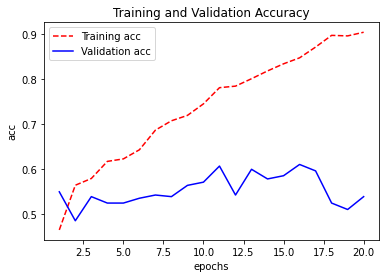

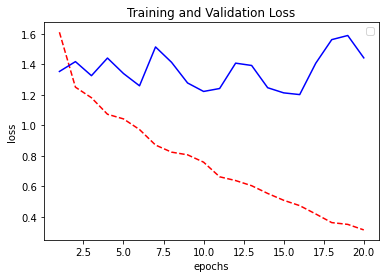

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [12]:
test_lost, test_acc= modelFE.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

47/47 [==============================] - 11s 236ms/step - loss: 1.3398 - accuracy: 0.5911
Test Accuracy: 0.5910543203353882


In [10]:
# Salvar el modelo
modelFE.save('Contador_de_hojas_vtg.h5')

Confusion Matrix


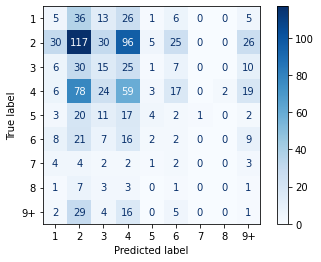

Classification Report
              precision    recall  f1-score   support

           1       0.08      0.05      0.06        92
           2       0.34      0.36      0.35       329
           3       0.14      0.16      0.15        94
           4       0.23      0.28      0.25       208
           5       0.24      0.07      0.10        60
           6       0.03      0.03      0.03        65
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        16
          9+       0.01      0.02      0.02        57

    accuracy                           0.22       939
   macro avg       0.12      0.11      0.11       939
weighted avg       0.21      0.22      0.21       939



In [13]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
Y_pred = modelFE.predict(test_generator, len(test_dir) // (32+1))
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['1', '2','3','4','5','6','7','8','9+']
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))